In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


### Importación de la data

In [22]:
data = np.load("./proyecto_training_data.npy")
data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

### DataFrame

In [23]:
dataset = pd.DataFrame(data, columns = ["SalePrice", "OverallQual", "lstFlrSF",
                                        "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
dataset

,SalePrice,OverallQual,lstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


<function matplotlib.pyplot.show(*args, **kw)>

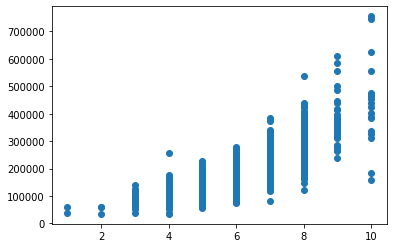

In [24]:
plt.scatter(dataset["OverallQual"], dataset["SalePrice"])
plt.show

### Se crean arreglos de nombrandolos x y y los cuales serviran para realizar el modelo.

In [75]:
x = dataset["OverallQual"].values.reshape(-1, 1)
y = dataset["SalePrice"].values.reshape(-1, 1)

### Se creo un split para realizar pruebas del modelo

In [26]:
from sklearn.model_selection import train_test_split
DataTrain, DataTest, DataTrain_Sales, DataTest_Sales = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=123)

## Entrenar el modelo

### Regresión Lineal

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm_1 = LinearRegression()
lm_1.fit(DataTrain, DataTrain_Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm_1.coef_

array([[44976.49429688]])

In [30]:
lm_1.intercept_

array([-94032.19372475])

### Gráfica del Modelo

In [31]:
Y_predict_from_train = lm_1.predict(DataTrain)
Y_predict_from_train

array([[130850.27775967],
       [ 40897.2891659 ],
       [130850.27775967],
       ...,
       [220803.26635344],
       [130850.27775967],
       [175826.77205655]])

<function matplotlib.pyplot.show(*args, **kw)>

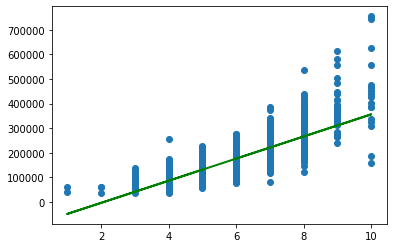

In [32]:
plt.scatter(dataset["OverallQual"], dataset["SalePrice"])
plt.plot(DataTrain, Y_predict_from_train, color="green", linewidth=2 )
plt.show

### R^2

In [33]:
lm_1.score(DataTrain, DataTrain_Sales)

0.6252097749070478

### RMSE

In [34]:
from sklearn import metrics
import math
Y_predicts_test = lm_1.predict(DataTest)
RMSE = math.sqrt(metrics.mean_squared_error(DataTest_Sales, Y_predicts_test))
RMSE

46330.475917329764

### Analisis Exploratorio

In [48]:
Columns = ["SalePrice", "OverallQual", "lstFlrSF",
                                        "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

In [53]:
# Media
for i in Columns:
    print('Media de ' + i)
    print(np.median(dataset[i]))

Media de SalePrice
163000.0
Media de OverallQual
6.0
Media de lstFlrSF
1087.0
Media de TotRmsAbvGrd
6.0
Media de YearBuilt
1973.0
Media de LotFrontage
nan


In [52]:
# Valor Maximo
for i in Columns:
    print('Maximo de ' + i)
    print(np.max(dataset[i]))


Maximo de SalePrice
755000.0
Maximo de OverallQual
10.0
Maximo de lstFlrSF
4692.0
Maximo de TotRmsAbvGrd
14.0
Maximo de YearBuilt
2010.0
Maximo de LotFrontage
313.0


In [54]:
# Valor Minimo
for i in Columns:
    print('Minimo de ' + i)
    print(np.min(dataset[i]))


Minimo de SalePrice
34900.0
Minimo de OverallQual
1.0
Minimo de lstFlrSF
334.0
Minimo de TotRmsAbvGrd
2.0
Minimo de YearBuilt
1872.0
Minimo de LotFrontage
21.0


In [56]:
# Rango
for i in Columns:
    print('Rango Peak To Peak de ' + i)
    print(np.ptp(dataset[i]))


Rango de SalePrice
720100.0
Rango de OverallQual
9.0
Rango de lstFlrSF
4358.0
Rango de TotRmsAbvGrd
12.0
Rango de YearBuilt
138.0
Rango de LotFrontage
nan


In [57]:
# Desviacion Estandar
for i in Columns:
    print('Desviacion Estandar de ' + i)
    print(np.std(dataset[i]))

Desviacion Estandar de SalePrice
79415.29188606751
Desviacion Estandar de OverallQual
1.3825228366585944
Desviacion Estandar de lstFlrSF
386.4553223022891
Desviacion Estandar de TotRmsAbvGrd
1.6248365536982048
Desviacion Estandar de YearBuilt
30.192558810489455
Desviacion Estandar de LotFrontage
24.27463944767602


Histograma de SalePrice


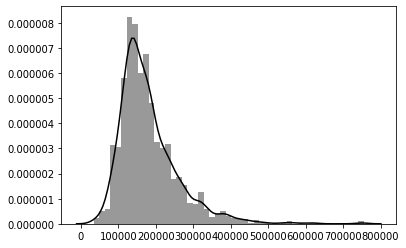

Histograma de OverallQual


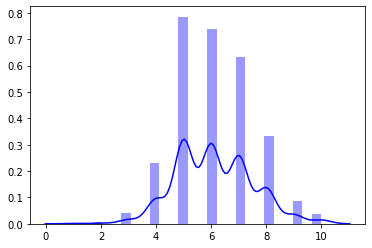

Histograma de lstFlrSF


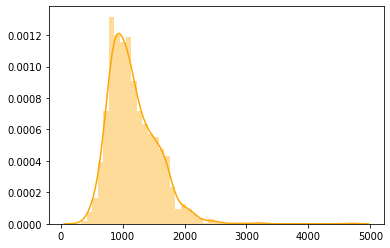

Histograma de TotRmsAbvGrd


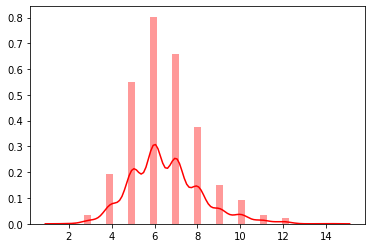

Histograma de YearBuilt


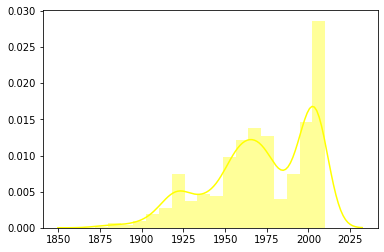

Histograma de LotFrontage


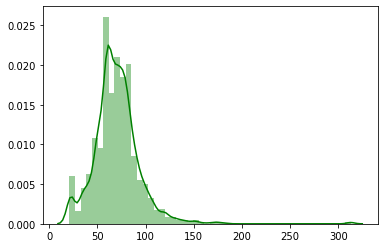

In [74]:
colores = {"SalePrice":"black" , "OverallQual":'Blue' , "lstFlrSF":'Orange' , "TotRmsAbvGrd":'Red' , "YearBuilt":'Yellow' , "LotFrontage":'Green' }
for k, v in colores.items():
    print('Histograma de ' + k)
    b = dataset[k].to_numpy()
    ax = sns.distplot(b, color = v)
    plt.show()

In [86]:
x1 = dataset["OverallQual"]
y1 = dataset["SalePrice"]

In [97]:
# Correlacion entre X y Y
z = lm_1.coef_
z

array([[44976.49429688]])

Scatter plot X-Y


Text(0, 0.5, 'y')

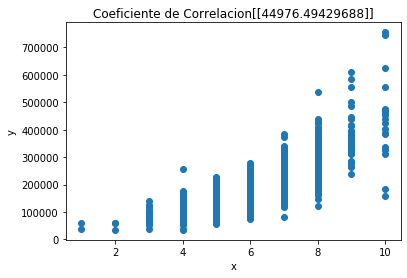

In [101]:
print("Scatter plot X-Y")
plt.scatter(x1, y1)
plt.title('Coeficiente de Correlacion' + str(z))
plt.xlabel('x')
plt.ylabel('y')